In [1]:
packages = !pip list
for x in packages:
    if "qiskit" in x:
        print(x)

qiskit                1.1.0
qiskit-aer            0.14.1
qiskit-ibm-runtime    0.23.0


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum",token="#")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

# CIRCUIT IDENTITIES PART A

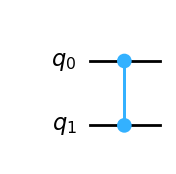

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1
# a controlled-Z
qc.cz(c,t)
qc.draw('mpl')

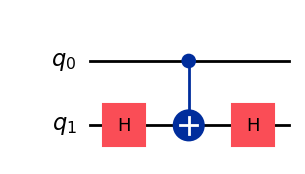

In [4]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw('mpl')

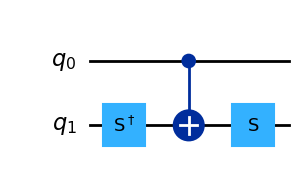

In [5]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw('mpl')

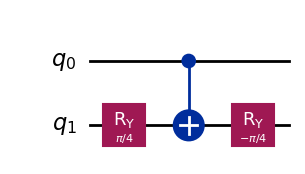

In [6]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw('mpl')

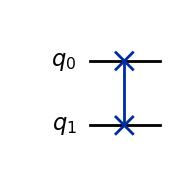

In [7]:
a = 0
b = 1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw('mpl')

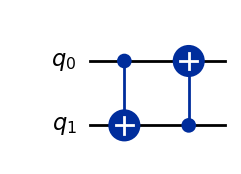

In [8]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw('mpl')

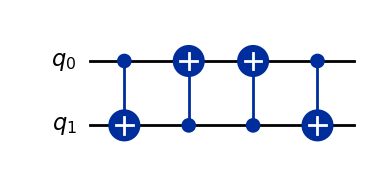

In [9]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw('mpl')

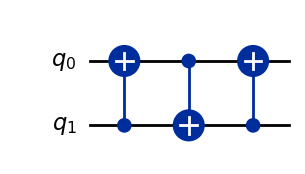

In [10]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw('mpl')

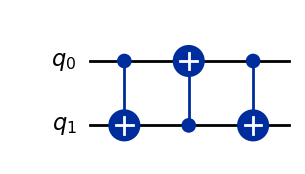

In [11]:
qc = QuantumCircuit(2)

# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw('mpl')

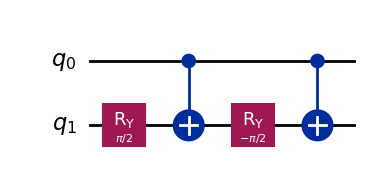

In [12]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw('mpl')

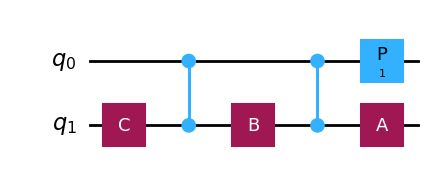

In [13]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

qc = QuantumCircuit(2)
qc.append(C, [t])

qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw('mpl')

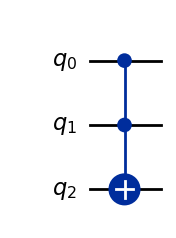

In [14]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw('mpl')

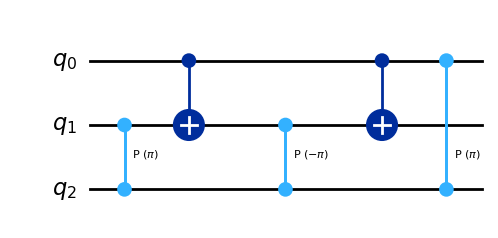

In [15]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)

qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw('mpl')

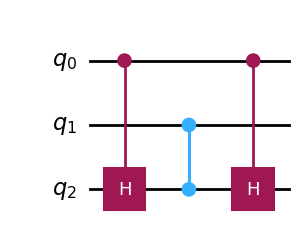

In [16]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw('mpl')

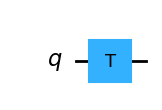

In [17]:
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw('mpl')

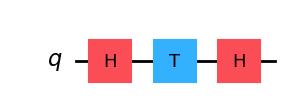

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw('mpl')

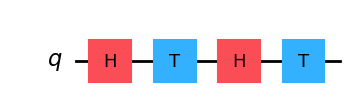

In [19]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw('mpl')

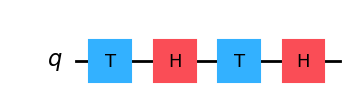

In [20]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)

qc.h(0)
qc.draw('mpl')

# CIRCUIT IDENTITIES PART B

### I) H X H = Z

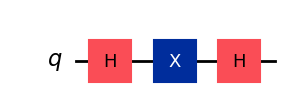

In [21]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(1)
from qiskit import QuantumCircuit, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
qc = QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.h(0)
qc.draw('mpl')

In [22]:
# Simulate the unitary
# Simulate the unitary
from qiskit_aer import Aer
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_8348\2624067238.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

### II) H Z H = X

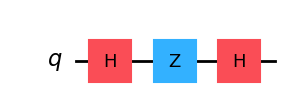

In [23]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw('mpl')

In [24]:
# Simulate the unitary
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_8348\2675202789.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

### III) H Y H = -Y

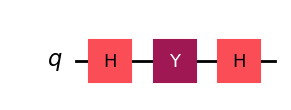

In [25]:
qc = QuantumCircuit(1)
qc.h(0)
qc.y(0)
qc.h(0)
qc.draw('mpl')

In [26]:
# Simulate the unitary
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_8348\2675202789.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>